In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
# calling the dataset
df=pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# dimensions
df.shape

(418, 12)

In [17]:
# checking for the Null values 
100*df.isna().mean()


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [20]:
# checking the balance of the dataset
survival_count = df["Survived"].value_counts()
survival_rate = 100*survival_count/df.shape[0]
survival_data = pd.concat([survival_count, survival_rate], axis=1).reset_index() 
survival_data.columns=["survived","count","percentage"]
survival_data

,survived,count,percentage
0,0,266,63.636364
1,1,152,36.363636


In [38]:
# function to show survival rate according to grps
def survival_acc_to_grp(df, colname):
 plt.figure(figsize=(5, 3)) 
 survival_by_pclass = df[["Survived", colname]].value_counts().reset_index()
 sns.barplot(survival_by_pclass, x=colname, y='count', hue='Survived')
 plt.ylabel("Number of Survived")
 plt.title(f"Survival According to {colname}")

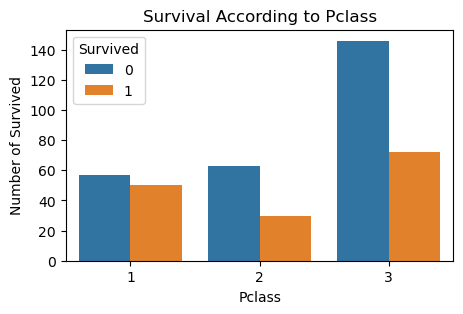

In [39]:
#survival among the Pclass
survival_acc_to_grp(df, 'Pclass')

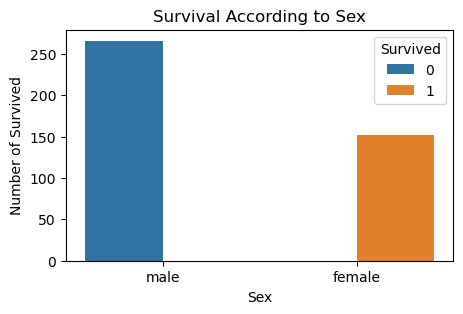

In [40]:
#survival among the Sex 
survival_acc_to_grp(df, 'Sex')

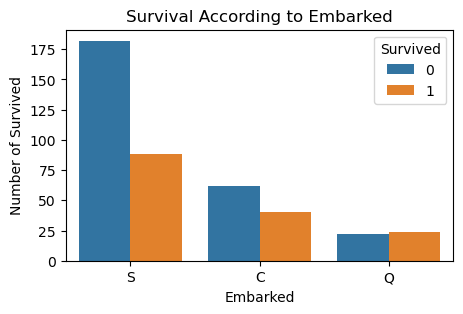

In [41]:
#survival among the Embarked 
survival_acc_to_grp(df, 'Embarked')


In [43]:
# function to show distribution of variables according to survival
def vars_acc_to_surv(df, colname):
 plt.figure(figsize=(5, 3))
 sns.kdeplot(df, x=colname, hue='Survived') 
 plt.title(f'{colname} distribution according to the survival')

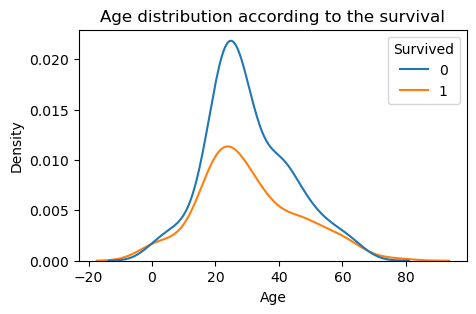

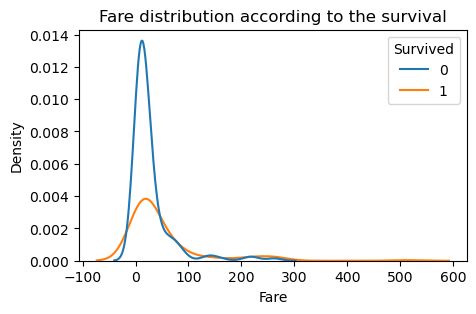

In [46]:
# age distribution according to survival status  
vars_acc_to_surv(df,'Age')

# fare distribution according to survival status 
vars_acc_to_surv(df,'Fare')

In [70]:
#function to visualise count data according to survival 
def count_acc_to_surv(df, colname):
 plt.figure(figsize=(5, 3)) 
 df1 = df.groupby(['SibSp', 'Survived']).count()['PassengerId'].reset_index() 
 sns.barplot(df1, x='SibSp', y='PassengerId', hue='Survived') 
 plt.title(f'{colname} according to survival') 
 plt.xlabel(f'{colname}') 

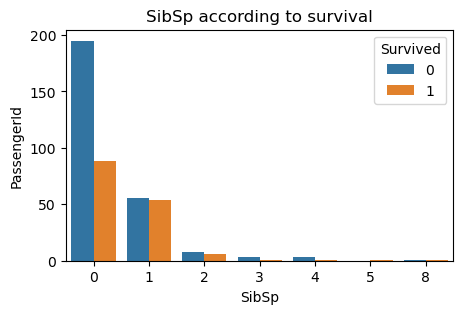

In [71]:
#Sibsp distribution according to survival status 
count_acc_to_surv(df,'SibSp')

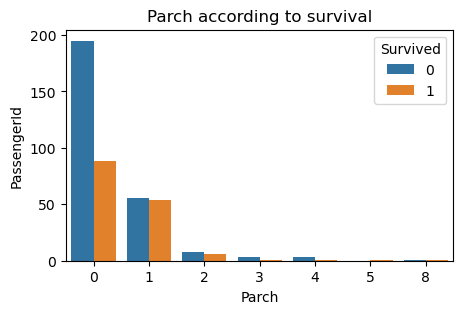

In [72]:
#Parch distribution according to survival status 
count_acc_to_surv(df,"Parch")

Text(0.5, 1.0, 'Comparison of the continuous\xa0variables')

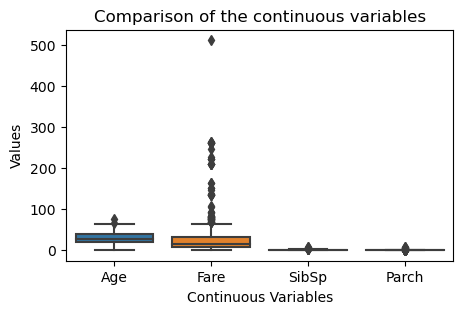

In [75]:
#variabilty and the location of the continuous variables
cont_vars=pd.melt(df, value_vars=['Age', 'Fare', 'SibSp', 'Parch']) 
plt.figure(figsize=(5,3))
sns.boxplot(cont_vars, x='variable', y='value')
plt.xlabel("Continuous Variables")
plt.ylabel('Values')
plt.title('Comparison of the continuous variables')

In [79]:
#taking out the important features 
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [137]:
# deleting rows that has Null values in 'Fare' Column 
df = df.dropna(subset='Fare')

In [141]:
#handling imbalance
df_survived=df [df['Survived']==1] 
df_not_survived = df [df['Survived']==0]
df_survived_resampled = df_survived.sample(n=df_not_survived.shape[0], replace=True, random_state=101)
df_balanced = pd.concat([df_not_survived, df_survived_resampled]).sample(frac=1, random_state=26)
df_balanced


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
195,1087,0,3,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,347465,7.8542,NaN,S
332,1224,0,3,"Thomas, Mr. Tannous",male,27.0,0,0,2684,7.2250,NaN,C
219,1111,0,3,"Thomson, Mr. Alexander Morrison",male,27.0,0,0,32302,8.0500,NaN,S
118,1010,0,1,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C
382,1274,1,3,"Risien, Mrs. Samuel (Emma)",female,27.0,0,0,364498,14.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
259,1151,0,3,"Midtsjo, Mr. Karl Albert",male,21.0,0,0,345501,7.7750,NaN,S
128,1020,0,2,"Bowenur, Mr. Solomon",male,42.0,0,0,211535,13.0000,NaN,S
166,1058,0,1,"Brandeis, Mr. Emil",male,48.0,0,0,PC 17591,50.4958,B10,C
309,1201,1,3,"Hansen, Mrs. Claus Peter (Jennie L Howard)",female,45.0,1,0,350026,14.1083,NaN,S


In [142]:
df_balanced['Survived'].value_counts()

Survived
0    265
1    265
Name: count, dtype: int64

In [147]:
# Splitting into X and y
X = df_balanced.drop(['Survived'], axis=1)
y = df_balanced['Survived']

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1055)

# Print shapes
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (424, 11)
X_test: (106, 11)
y_train: (424,)
y_test: (106,)


In [162]:
# preparing the model pipeline that includes
cont_cols = ['Age', 'Fare']
disc_cols = ['SibSp', 'Parch']
cat_cols = ['Pclass', 'Sex', 'Embarked']
continuous_transformer= Pipeline(steps=[ ('scaler', StandardScaler())])
discrete_transformer=Pipeline(steps=[ ('scaler', MinMaxScaler())])
categorical_transformer=Pipeline(steps=[ ('onehot', OneHotEncoder(drop='first'))])
preprocessor =ColumnTransformer( transformers=[ ('cont', continuous_transformer, cont_cols), ('disc', discrete_transformer, disc_cols), ('cat', categorical_transformer, cat_cols)])
model=Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cont',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('disc',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['SibSp', 'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', LogisticRegression())])

In [163]:
# prediction
y_pred=model.predict(X_test)
print(y_pred)

[0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0]


In [167]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        48

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



Text(33.22222222222222, 0.5, 'Predicted Value')

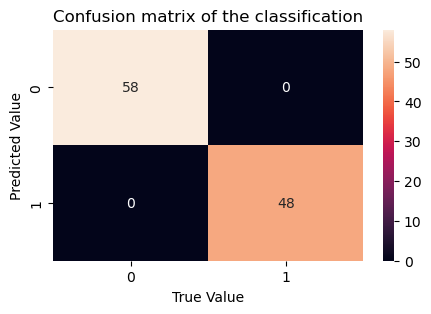

In [168]:
cm=confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(5,3)) 
sns.heatmap(cm, annot=True) 
plt.title('Confusion matrix of the classification') 
plt.xlabel('True Value') 
plt.ylabel('Predicted Value')


In [170]:

# saving the model 
with open('./model_logistic.pkl', 'wb') as fp: pickle.dump(model,fp)